In [20]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pandas_datareader import data
from collections import Counter
import matplotlib.pyplot as plt
from itertools import combinations 

import requests 
from bs4 import BeautifulSoup

URL = "https://markets.businessinsider.com/index/market-capitalization/nasdaq_100"
req = requests.get(URL)

soup = BeautifulSoup(req.content, 'html5lib')
t = list()

for a in soup.findAll('a', href = True):
    if a['href'][0] == "/":
        if ('/stocks/' in a['href'] and a['href'].split('/')[2] != "" and len(a['href'].split('/')[2]) < 5):
            t.append(a['href'].split('/')[2])

t = t[:20]



In [21]:
t


['aapl',
 'goog',
 'amzn',
 'fb',
 'adbe',
 'csco',
 'intc',
 'cost',
 'avgo',
 'chtr',
 'amgn',
 'amd',
 'amat',
 'gild',
 'adp',
 'bkng',
 'csx',
 'fisv',
 'ilmn',
 'adsk']

In [22]:
df = pd.DataFrame()
end = dt.date(2021,8,11)  
for ticker in t:
    
    df[ticker] = yf.download(ticker,start = '2021-01-01')['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [23]:
df


,aapl,goog,amzn,fb,adbe,csco,intc,cost,avgo,chtr,amgn,amd,amat,gild,adp,bkng,csx,fisv,ilmn,adsk
Date,,,,,,,,,,,,,,,,,,,,
2020-12-31,132.069473,1751.880005,3256.929932,273.160004,500.119995,43.768875,48.898537,374.531616,431.079620,661.549988,224.892914,91.709999,85.986183,57.009632,174.477386,2227.270020,30.075211,113.860001,370.000000,305.339996
2021-01-04,128.804825,1728.239990,3186.629883,268.940002,485.339996,43.344891,48.751308,377.881531,418.644897,647.030029,221.704178,92.300003,86.554100,58.819931,167.308167,2164.080078,29.160524,111.919998,367.760010,296.839996
2021-01-05,130.397324,1740.920044,3218.510010,270.970001,485.690002,43.364609,49.673923,373.497833,421.480347,636.590027,222.780136,92.769997,89.274170,58.712292,166.842773,2188.070068,29.654324,112.360001,374.899994,301.700012
2021-01-06,126.007957,1735.290039,3138.379883,263.309998,466.309998,43.778736,50.154858,367.811981,418.881165,624.510010,228.150101,90.330002,90.499702,60.620441,166.258530,2249.810059,30.443073,114.180000,376.549988,302.869995
2021-01-07,130.307755,1787.250000,3162.159912,268.739990,477.739990,44.330894,51.224697,365.724548,436.533966,629.770020,228.903259,95.160004,94.216133,61.178207,167.199249,2239.850098,31.162226,114.430000,382.410004,315.200012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-16,151.119995,2778.320068,3298.989990,366.559998,636.940002,56.279999,53.470001,452.859985,488.140015,782.580017,231.070007,107.480003,131.690002,71.709999,216.559998,2130.889893,33.869999,112.339996,524.840027,330.179993
2021-08-17,150.190002,2746.010010,3241.959961,358.450012,635.010010,56.009998,52.689999,452.339996,478.690002,788.369995,231.199997,107.559998,128.800003,73.029999,214.800003,2113.270020,33.740002,112.930000,522.890015,324.700012
2021-08-18,146.360001,2731.399902,3201.219971,355.450012,626.770020,55.150002,52.189999,446.209991,468.970001,785.469971,226.839996,103.440002,127.370003,71.959999,208.470001,2086.310059,33.759998,114.260002,510.609985,323.519989


In [24]:
com = combinations(t,5)
combis = [] 


In [25]:
for i in list(com):
    combis.append(list(i))
combis


[['aapl', 'goog', 'amzn', 'fb', 'adbe'],
 ['aapl', 'goog', 'amzn', 'fb', 'csco'],
 ['aapl', 'goog', 'amzn', 'fb', 'intc'],
 ['aapl', 'goog', 'amzn', 'fb', 'cost'],
 ['aapl', 'goog', 'amzn', 'fb', 'avgo'],
 ['aapl', 'goog', 'amzn', 'fb', 'chtr'],
 ['aapl', 'goog', 'amzn', 'fb', 'amgn'],
 ['aapl', 'goog', 'amzn', 'fb', 'amd'],
 ['aapl', 'goog', 'amzn', 'fb', 'amat'],
 ['aapl', 'goog', 'amzn', 'fb', 'gild'],
 ['aapl', 'goog', 'amzn', 'fb', 'adp'],
 ['aapl', 'goog', 'amzn', 'fb', 'bkng'],
 ['aapl', 'goog', 'amzn', 'fb', 'csx'],
 ['aapl', 'goog', 'amzn', 'fb', 'fisv'],
 ['aapl', 'goog', 'amzn', 'fb', 'ilmn'],
 ['aapl', 'goog', 'amzn', 'fb', 'adsk'],
 ['aapl', 'goog', 'amzn', 'adbe', 'csco'],
 ['aapl', 'goog', 'amzn', 'adbe', 'intc'],
 ['aapl', 'goog', 'amzn', 'adbe', 'cost'],
 ['aapl', 'goog', 'amzn', 'adbe', 'avgo'],
 ['aapl', 'goog', 'amzn', 'adbe', 'chtr'],
 ['aapl', 'goog', 'amzn', 'adbe', 'amgn'],
 ['aapl', 'goog', 'amzn', 'adbe', 'amd'],
 ['aapl', 'goog', 'amzn', 'adbe', 'amat'],
 ['a

In [26]:
len(combis)

15504

In [27]:
df1= pd.DataFrame(combis)

In [28]:
df1

,0,1,2,3,4
0,aapl,goog,amzn,fb,adbe
1,aapl,goog,amzn,fb,csco
2,aapl,goog,amzn,fb,intc
3,aapl,goog,amzn,fb,cost
4,aapl,goog,amzn,fb,avgo
...,...,...,...,...,...
15499,adp,bkng,csx,fisv,adsk
15500,adp,bkng,csx,ilmn,adsk
15501,adp,bkng,fisv,ilmn,adsk
15502,adp,csx,fisv,ilmn,adsk


In [29]:
percentage_returns= df.pct_change()

In [30]:
percentage_returns.cov()

,aapl,goog,amzn,fb,adbe,csco,intc,cost,avgo,chtr,amgn,amd,amat,gild,adp,bkng,csx,fisv,ilmn,adsk
aapl,0.000271,0.000140,0.000152,0.000171,0.000178,0.000083,0.000139,0.000084,0.000195,0.000069,0.000058,0.000203,0.000221,0.000029,0.000076,0.000053,0.000049,0.000053,0.000163,0.000178
goog,0.000140,0.000235,0.000136,0.000174,0.000139,0.000047,0.000104,0.000055,0.000147,0.000075,0.000023,0.000141,0.000180,0.000028,0.000031,0.000114,0.000058,0.000079,0.000079,0.000171
amzn,0.000152,0.000136,0.000240,0.000158,0.000152,0.000037,0.000115,0.000060,0.000155,0.000032,0.000024,0.000145,0.000152,0.000007,0.000030,0.000087,0.000020,0.000037,0.000116,0.000139
fb,0.000171,0.000174,0.000158,0.000342,0.000159,0.000050,0.000114,0.000076,0.000197,0.000084,0.000043,0.000186,0.000215,0.000023,0.000051,0.000069,0.000024,0.000057,0.000136,0.000155
adbe,0.000178,0.000139,0.000152,0.000159,0.000245,0.000066,0.000128,0.000086,0.000202,0.000092,0.000038,0.000212,0.000226,0.000007,0.000058,0.000091,0.000049,0.000060,0.000144,0.000220
csco,0.000083,0.000047,0.000037,0.000050,0.000066,0.000135,0.000079,0.000051,0.000080,0.000034,0.000054,0.000055,0.000112,0.000047,0.000084,0.000066,0.000062,0.000062,0.000044,0.000085
intc,0.000139,0.000104,0.000115,0.000114,0.000128,0.000079,0.000444,0.000056,0.000234,0.000072,0.000044,0.000177,0.000385,0.000013,0.000056,0.000153,0.000108,0.000061,0.000131,0.000192
cost,0.000084,0.000055,0.000060,0.000076,0.000086,0.000051,0.000056,0.000114,0.000082,0.000054,0.000035,0.000066,0.000075,0.000008,0.000044,0.000031,0.000033,0.000033,0.000056,0.000085
avgo,0.000195,0.000147,0.000155,0.000197,0.000202,0.000080,0.000234,0.000082,0.000357,0.000069,0.000060,0.000311,0.000433,0.000027,0.000098,0.000147,0.000078,0.000071,0.000208,0.000253
chtr,0.000069,0.000075,0.000032,0.000084,0.000092,0.000034,0.000072,0.000054,0.000069,0.000236,0.000050,0.000078,0.000111,0.000009,0.000040,0.000089,0.000055,0.000067,0.000064,0.000095


as there is positive covariance between these stocks, that means that there is positive directional relationship between them 

In [31]:
percentage_returns.corr()

,aapl,goog,amzn,fb,adbe,csco,intc,cost,avgo,chtr,amgn,amd,amat,gild,adp,bkng,csx,fisv,ilmn,adsk
aapl,1.000000,0.553286,0.597625,0.562162,0.693477,0.433009,0.400298,0.480294,0.626058,0.272905,0.265766,0.486199,0.451707,0.135885,0.368094,0.158238,0.205402,0.229332,0.415510,0.579212
goog,0.553286,1.000000,0.573006,0.613956,0.580159,0.265072,0.323092,0.337125,0.505670,0.317155,0.112180,0.362217,0.395064,0.141570,0.162447,0.363410,0.259290,0.367199,0.216111,0.597530
amzn,0.597625,0.573006,1.000000,0.552107,0.629100,0.203764,0.351612,0.362806,0.530669,0.133529,0.117460,0.369372,0.331111,0.034034,0.154266,0.275310,0.088042,0.170753,0.314718,0.479536
fb,0.562162,0.613956,0.552107,1.000000,0.551160,0.231098,0.293218,0.385396,0.564248,0.296753,0.173386,0.397401,0.391509,0.097532,0.220840,0.181741,0.088080,0.220271,0.308097,0.450057
adbe,0.693477,0.580159,0.629100,0.551160,1.000000,0.360506,0.387990,0.513214,0.683040,0.381185,0.182131,0.536103,0.486166,0.033126,0.296567,0.283456,0.216282,0.273285,0.386435,0.754302
csco,0.433009,0.265072,0.203764,0.231098,0.360506,1.000000,0.324585,0.412222,0.362580,0.192405,0.346458,0.187568,0.323359,0.308661,0.575352,0.277277,0.365749,0.379251,0.159534,0.391903
intc,0.400298,0.323092,0.351612,0.293218,0.387990,0.324585,1.000000,0.251100,0.589093,0.224006,0.156367,0.332520,0.615742,0.046254,0.210932,0.354409,0.354014,0.208112,0.260231,0.488031
cost,0.480294,0.337125,0.362806,0.385396,0.513214,0.412222,0.251100,1.000000,0.408280,0.329430,0.243784,0.243598,0.238084,0.057417,0.329058,0.141832,0.212192,0.220774,0.218918,0.428842
avgo,0.626058,0.505670,0.530669,0.564248,0.683040,0.362580,0.589093,0.408280,1.000000,0.236126,0.236695,0.649616,0.772168,0.108575,0.412478,0.380388,0.286133,0.269022,0.461498,0.716597
chtr,0.272905,0.317155,0.133529,0.296753,0.381185,0.192405,0.224006,0.329430,0.236126,1.000000,0.244634,0.201775,0.244665,0.047654,0.208087,0.282147,0.247105,0.312162,0.174862,0.333253


<AxesSubplot:>

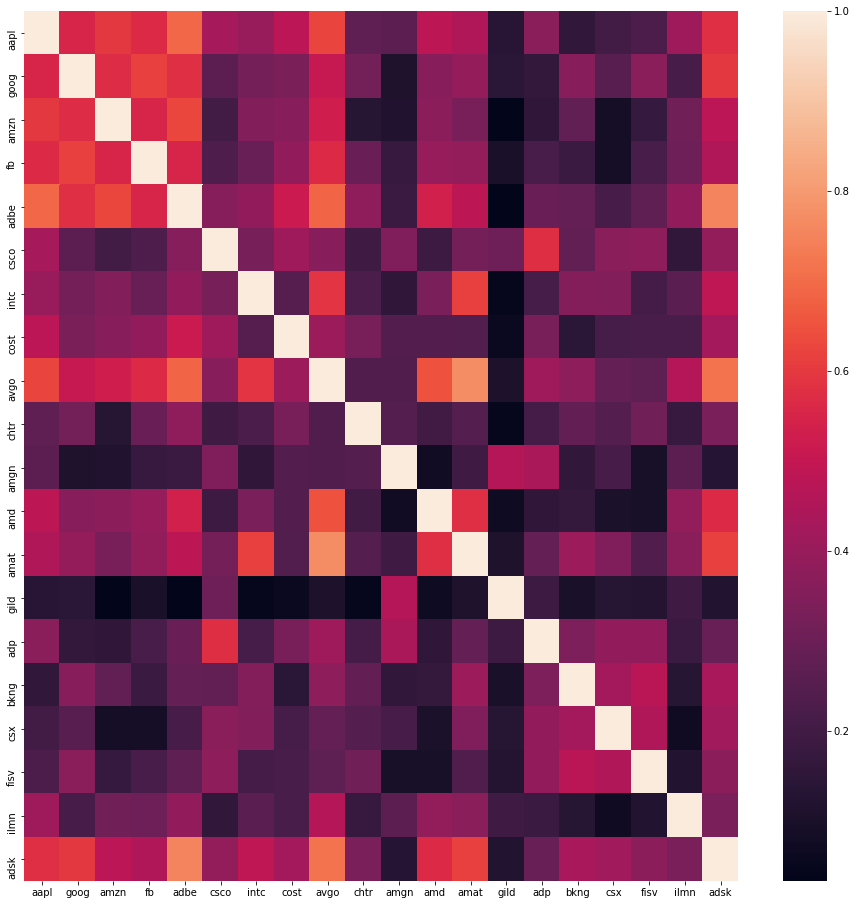

In [38]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(percentage_returns.corr())

now to find out the correlation of the different combinations 


In [61]:
def VAR(portfolio_list):
    variance = []
    for i in portfolio_list:
        i_cov = (0.20*0.20) * df[i].pct_change().cov() * 252
        variance.append(np.sqrt(i_cov.values.sum()))
 
    return variance
#equal weights of stocks is assumed in a 5 stock portfolio, hence the 0.2 in the formula
#annualisation factor here is 252

In [63]:
df1['VAR']=VAR(combis)

In [64]:
volatility = df1['VAR'].tolist()

In [65]:
print('The Answer is:', combis[volatility.index(min(volatility))])

The Answer is: ['amzn', 'cost', 'amgn', 'gild', 'fisv']


In [ ]:
The companies are amazon, amgen, costco, gilead sciences, fiserv inc